# Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv ('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df=df.drop (columns=['Column1','Column2','Column3','Column4','status_id'])

Elimino columnes buides i que no aporten info

In [4]:
df['status_published'] = pd.to_datetime(df['status_published']).dt.date



Passo a format data la columna status_published

In [5]:
df = df.set_index('status_published')


Passo status_published a index

In [6]:
df = pd.get_dummies(df, columns=["status_type"])
df.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
status_published,,,,,,,,,,,,,
2018-04-22,529,512,262,432,92,3,1,1,0,0,0,0,1
2018-04-21,150,0,0,150,0,0,0,0,0,0,1,0,0
2018-04-21,227,236,57,204,21,1,1,0,0,0,0,0,1
2018-04-21,111,0,0,111,0,0,0,0,0,0,1,0,0
2018-04-18,213,0,0,204,9,0,0,0,0,0,1,0,0


Faig dummies a status_type

<Figure size 432x288 with 0 Axes>

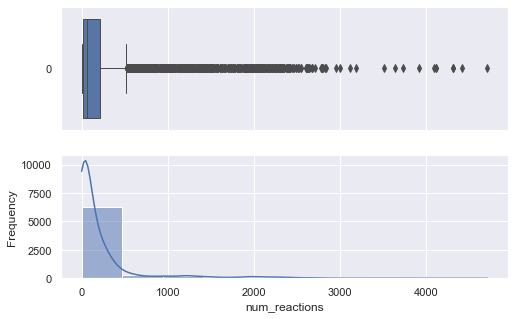

<Figure size 576x360 with 0 Axes>

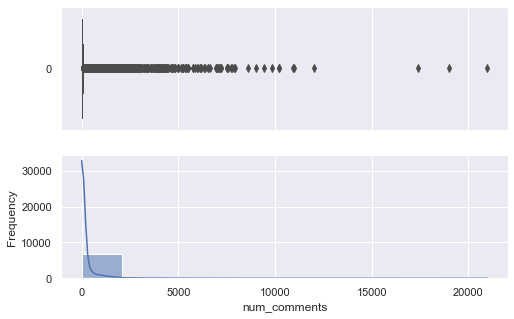

<Figure size 576x360 with 0 Axes>

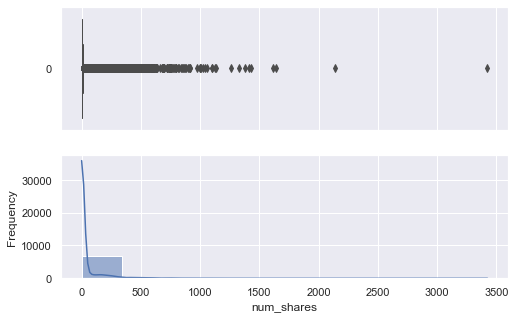

<Figure size 576x360 with 0 Axes>

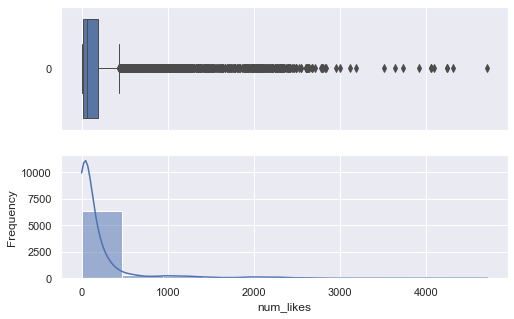

<Figure size 576x360 with 0 Axes>

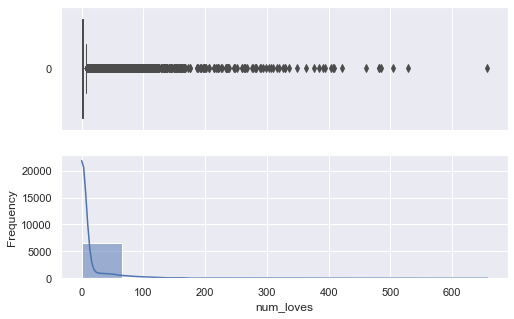

<Figure size 576x360 with 0 Axes>

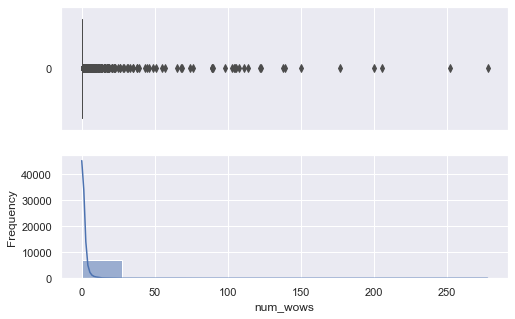

<Figure size 576x360 with 0 Axes>

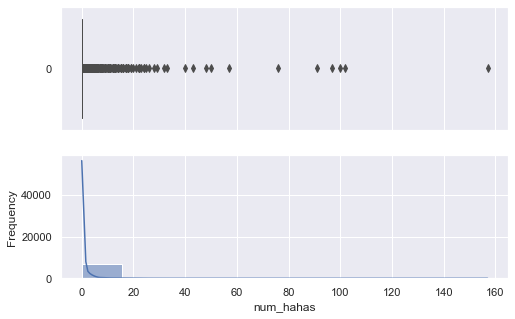

<Figure size 576x360 with 0 Axes>

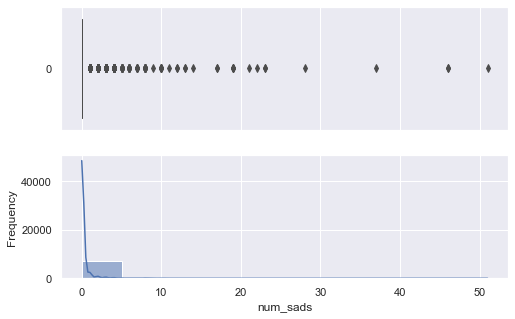

<Figure size 576x360 with 0 Axes>

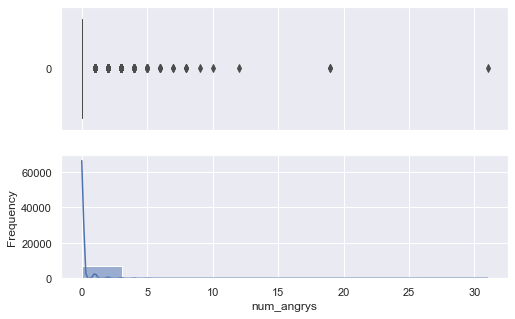

<Figure size 576x360 with 0 Axes>

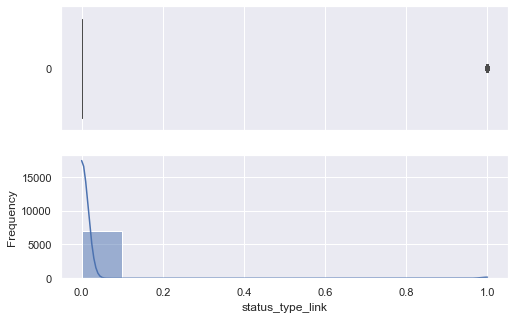

<Figure size 576x360 with 0 Axes>

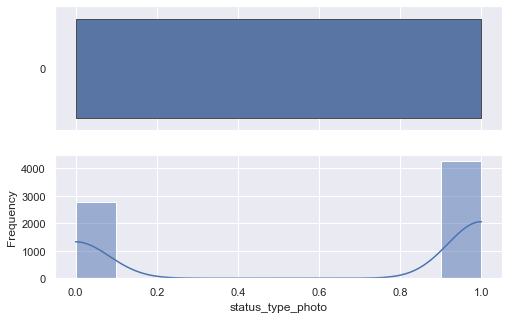

<Figure size 576x360 with 0 Axes>

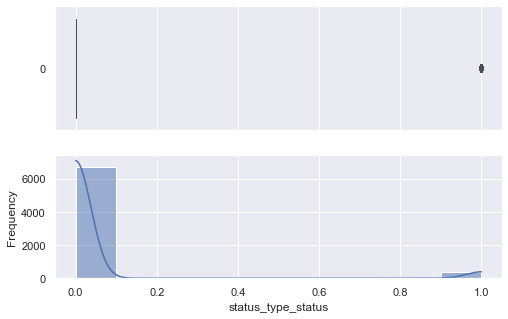

<Figure size 576x360 with 0 Axes>

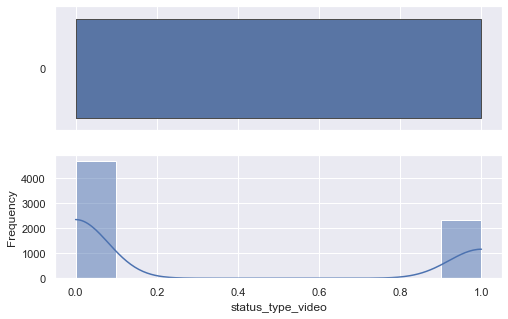

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0, orient='h')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [8]:
from scipy import stats

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  num_reactions amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_comments amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_shares amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_likes amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_loves amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_wows amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_hahas amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_sads amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_angrys amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  status_type_link amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  status_type_p

Cap de les columnes té una distribució normal i totes tenen outliers, per tant aplicarem robust escaler a totes les columnes,exceptuant les creades per dummies. 

In [9]:
from sklearn import preprocessing 

from sklearn.preprocessing import RobustScaler
columnsRobust = ['num_reactions' ,'num_comments' ,'num_shares' ,'num_likes' ,'num_loves' ,'num_wows' ,'num_hahas' ,'num_sads' ,'num_angrys']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

Calcular nombre de dimensions a reduir

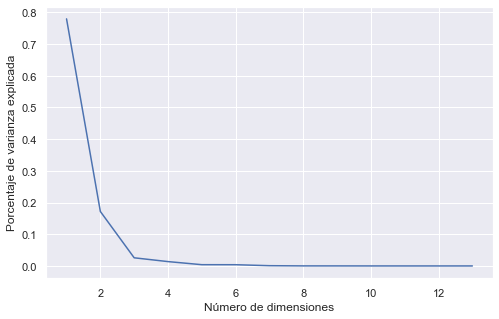

In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calcular el porcentaje de varianza explicada por cada componente principal
pca = PCA()
pca.fit(df)
explained_variance = pca.explained_variance_ratio_

# Graficar el porcentaje de varianza explicada
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Número de dimensiones')
plt.ylabel('Porcentaje de varianza explicada')
plt.show()


Reduim les dimensions i calculem la pèrdua d'informació

In [11]:
# Creamos una instancia de la clase PCA
pca = PCA(n_components=3)

# Aplicamos PCA a nuestro conjunto de datos
df_reduit = pca.fit_transform(df)
import numpy as np
from sklearn.decomposition import PCA


# Calcular el porcentaje de varianza explicado total de los datos originales
total_explained_variance = np.sum(pca.explained_variance_ratio_)

# Calcular el porcentaje de varianza explicado acumulado de las dimensiones reducidas
reduced_explained_variance = np.cumsum(pca.explained_variance_ratio_)[-1]

# Imprimir el porcentaje de varianza explicado total y el porcentaje de varianza explicado acumulado de las dimensiones reducidas
print(f"Porcentaje de varianza explicado total: {total_explained_variance}")
print(f"Porcentaje de varianza explicado acumulado de las dimensiones reducidas: {reduced_explained_variance}")

#Calcular la pérdida de información

information_loss = 1 - reduced_explained_variance
print(f"Pérdida de información: {information_loss}")

Porcentaje de varianza explicado total: 0.9772858038384092
Porcentaje de varianza explicado acumulado de las dimensiones reducidas: 0.9772858038384092
Pérdida de información: 0.02271419616159076


Decidim mantenir 3 mètriques, ja que tan sols tenim una pèrdua del 2,3%

Calcular nombre de clusters amb el mètode del codo

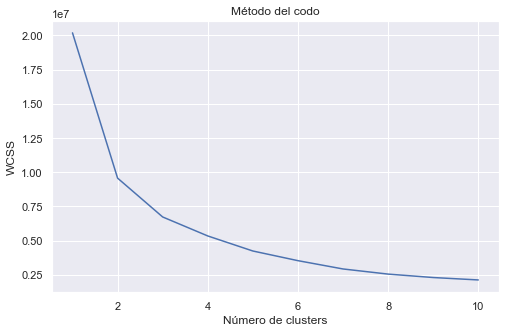

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convertir DataFrame a matriz numpy
X = df.values

# Crear una lista para almacenar las varianzas
wcss = []

# Utilizar diferentes valores de k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


Provem amb 2 clusters i més endavant amb 3 ja que l'angle és molt semblant

Apliquem K-means amb 2 clusters

In [13]:

# Crear objeto KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajustar modelo con el conjunto de datos
kmeans.fit(X)

# Obtener etiquetas de cada punto
labels = kmeans.labels_

# Obtener coordenadas de los centroides
cluster_centers = kmeans.cluster_centers_


Grafiquem resultats

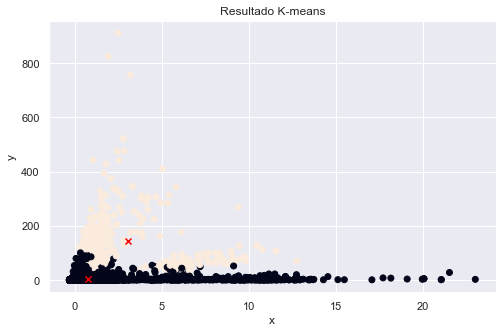

In [14]:
# Crear gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.title('Resultado K-means')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Avaluem resultats amb Silhouette

In [15]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)
silhouette_score_K2=silhouette_score

Silhouette Score:  0.8892533945736578


Obtenim un valor 0.89 en Silhouette i veient el gràfic podem valorar com a bons resultats la classificiació

Apliquem K-means amb 3 clusters

In [16]:

# Crear objeto KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar modelo con el conjunto de datos
kmeans.fit(X)

# Obtener etiquetas de cada punto
labels = kmeans.labels_

# Obtener coordenadas de los centroides
cluster_centers = kmeans.cluster_centers_

Grafiquem resultats

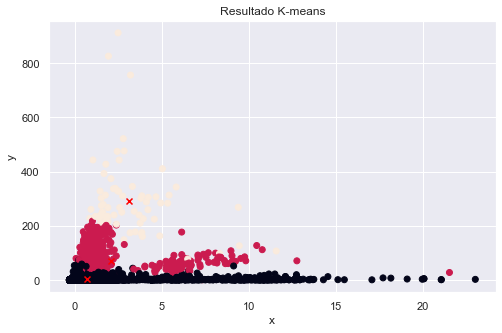

In [17]:
# Crear gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.title('Resultado K-means')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Avaluem resultats amb Silhouette

In [18]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
silhouette_score_K3=silhouette_score
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.8526123314086432


Obtenim un valor 0.85 en Silhouette i veient el gràfic podem valorar com a bons resultats la classificiació


Tenint en compte que amb k=2 hem obtingut un 89 en Silhouette i amb k=3 un 85 valorem que és més positiu fer 3 clústers, ja que ens permet una major segmentació mantenint una mètrica amb una valor força alt

# Apliquem clustering jeràrquic

Busquem el millor valor de clusters

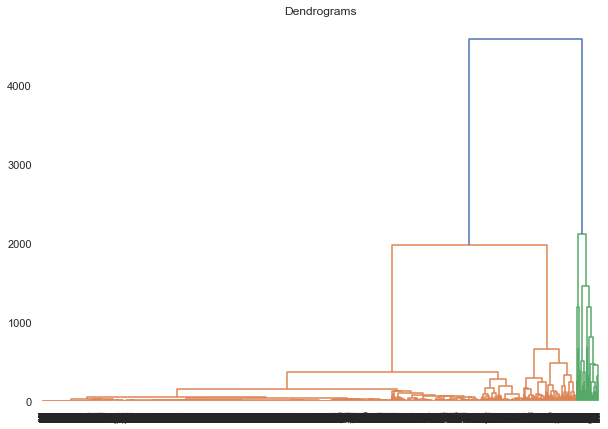

In [19]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

El millor valor seran 2 clusters, encara que també provarem amb 3

Clustering jeràrquic amb 2 clusters

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

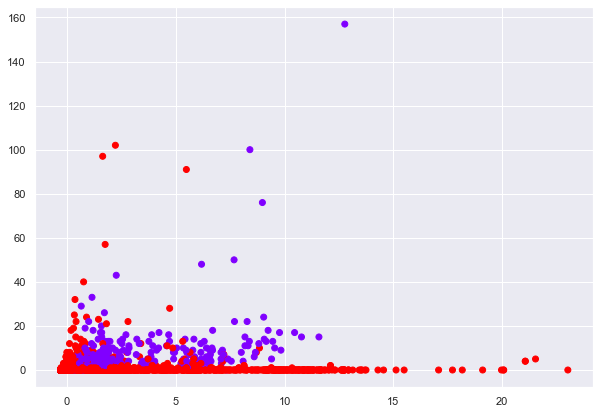

In [21]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['num_reactions'], df['num_hahas'], c=cluster.labels_, cmap='rainbow') 

Avaluem resultats amb Silhouette

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


# Perform Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(df)

# Calculate Silhouette Score
silhouette_score=silhouette_score(df, agg_cluster.labels_)
silhouette_score_cj2=silhouette_score
print (silhouette_score_cj2)


0.8917359431206133


Clustering jeràrquic amb 3 clusters

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0])

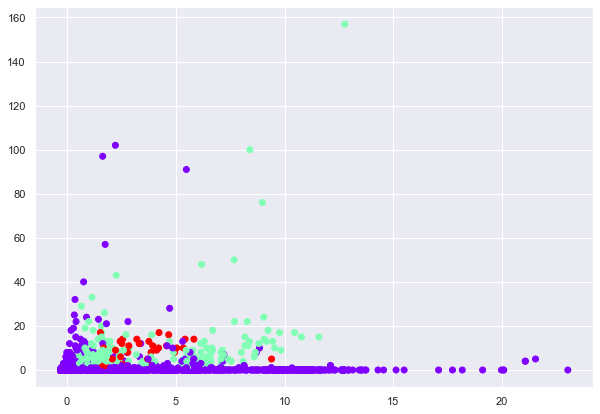

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['num_reactions'], df['num_hahas'], c=cluster.labels_, cmap='rainbow') 

Avaluem resultats amb Silhouette

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Load data
X = df

# Perform Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(X)

# Calculate Silhouette Score
silhouette_score=silhouette_score(X, agg_cluster.labels_)
silhouette_score_cj3= silhouette_score
print (silhouette_score_cj3)

0.8815163070698763


In [26]:
silhouette_score_K3

0.8526123314086432

In [35]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'K-Means','Clustering Jerarquic'
df_compar['K=2']= silhouette_score_K2,silhouette_score_cj2
df_compar['K=3']= silhouette_score_K3,silhouette_score_cj3
df_compar=df_compar.set_index('Mètodes')
df_compar

,K=2,K=3
Mètodes,,
K-Means,0.889253,0.852612
Clustering Jerarquic,0.891736,0.881516


Com podem veure el clustering jeràrquic ens dona uns majors resultats, sobretot quan apliquem amb 3 clusters, ja amb 2 la diferència és mínima